**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Mentoría**

*Edición 2023*

----

# Análisis y visualización

## Ejercicio 4 - Análisis y descripción de los datos del dataset de Noticias:

1. Nubes de palabras por su frecuencia
2. Podemos graficar frecuencia de palabras frecuencia de bigramas y trigramas
3. Qué más podemos explorar, visualizar/graficar para conocer el texto
4. Hay algo más que podamos hacer, para explorar y entender los datos que tenemos
5. ¿Hay datos faltantes? ¿Outliers?
6. Se puede agrupar los eventos y los cambios de precio según evento en una tabla
7. Con la tabla anterior calcular estadísticas descriptivas para cada evento y cada intervalo de tiempo. Esto puede incluir el promedio, la mediana, el min, max.

----

### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from wordcloud import WordCloud

### Recolección de datos

Inicialmente, importamos el dataset, analizamos su tamaño y los diferentes campos que dispone, con su tipo de datos:

In [3]:
news_data = pd.read_csv('https://gitlab.com/diplodatos/mentoria/-/raw/main/parte_1/datasets/news_data.csv')
news_data.shape

(303893, 25)

### Análisis del dataset

In [4]:
news_data.head()

text  \
0  plano texas december 8 2020 prnewswire europea...   
1  charlotte nc october 1 2020 prnewswire duke en...   
2  south san francisco calif october 5 2020 prnew...   
3  new york january 18 2021 prnewswire advancemen...   
4  englewood colo february 22 2021 prnewswire dis...   

                                               title  \
0  european wax center welcome jennifer vandervel...   
1  duke energy host virtual environmental social ...   
2  pliant therapeutic appoints mike ouimette gene...   
3  radiofrequency ablation device market revenue ...   
4  dish network report fourth quarter yearend 202...   

                    pub_time labels.ticker          labels.start_time  \
0  2020-12-08 09:00:00-05:00           MIK  2020-12-08 09:00:00-05:00   
1  2020-10-01 12:11:00-04:00           DUK  2020-10-01 12:11:00-04:00   
2  2020-10-05 08:00:00-04:00          PLRX  2020-10-05 09:29:00-04:00   
3  2021-01-18 02:30:00-05:00           NaN                        NaN   
4  2021-02-22 06:05:00-05:00          DISH  2021-02-22 06:09:00-05:00   

   labels.start_price_open  labels.start_price_close  labels.end_price_1day  \
0                    12.07                     12.07                  12.80   
1                    89.74                     89.78                  90.05   
2                    20.00                     20.00                  21.43   
3                      NaN                       NaN                    NaN   
4                    34.25                     34.25                  32.00   

   labels.end_price_2day  labels.end_price_3day  ...  \
0                12.4899                  13.00  ...   
1                91.0000                  92.00  ...   
2                21.9200                  24.35  ...   
3                    NaN                    NaN  ...   
4                30.8500                  31.40  ...   

  labels.highest_price_3day   labels.highest_time_1day  \
0                     13.20  2020-12-08 10:12:00-05:00   
1                     92.15  2020-10-01 15:21:00-04:00   
2                     24.49  2020-10-05 15:50:00-04:00   
3                       NaN                        NaN   
4                     34.98  2021-02-22 06:37:00-05:00   

    labels.highest_time_2day   labels.highest_time_3day  \
0  2020-12-08 10:12:00-05:00  2020-12-08 10:12:00-05:00   
1  2020-10-02 15:32:00-04:00  2020-10-02 15:32:00-04:00   
2  2020-10-06 09:35:00-04:00  2020-10-07 15:28:00-04:00   
3                        NaN                        NaN   
4  2021-02-22 06:37:00-05:00  2021-02-22 06:37:00-05:00   

   labels.lowest_price_1day  labels.lowest_price_2day  \
0                     11.98                     11.98   
1                     89.18                     88.65   
2                     19.73                     19.73   
3                       NaN                       NaN   
4                     31.25                     29.71   

  labels.lowest_price_3day    labels.lowest_time_1day  \
0                    11.98  2020-12-08 09:13:00-05:00   
1                    88.65  2020-10-01 14:03:00-04:00   
2                    19.73  2020-10-05 09:57:00-04:00   
3                      NaN                        NaN   
4                    29.71  2021-02-22 18:54:00-05:00   

     labels.lowest_time_2day    labels.lowest_time_3day  
0  2020-12-08 09:13:00-05:00  2020-12-08 09:13:00-05:00  
1  2020-10-02 09:29:00-04:00  2020-10-02 09:29:00-04:00  
2  2020-10-05 09:57:00-04:00  2020-10-05 09:57:00-04:00  
3                        NaN                        NaN  
4  2021-02-23 12:09:00-05:00  2021-02-23 12:09:00-05:00  

[5 rows x 25 columns]

En principio, podemos observar que contiene la siguiente información:

1- Noticias: en campos separados tenemos el texto correspondiente a la noticia, el título de la noticia y la fecha de publicación.
2- Empresa: en caso de tratarse sobre alguna empresa en particular, en una columna siguiente se muestra el ticker de la compañía en cuestión (ticker: código único con el que se identifica una acción en particular que cotiza en la bolsa de valores)
3- Precio: se muestra la evolución de los precios luego de publicada la noticia y para los siguientes 3 días (precio máximo, mínimo y de cierre). Cabe destacar que, según se observa, los precios máximos y mínimos corresponden a los del periodo analizado (3 días luego de publicada la noticia). Además, se muestra la fecha y hora en que se dio cada uno de estos precios.

Una vez conocida la información que contiene el dataset, pasamos a verificar los registros vacíos para tomar una decisión al respecto. Para esto, utilizamos los gráficos de la librería missingno:

<Axes: >

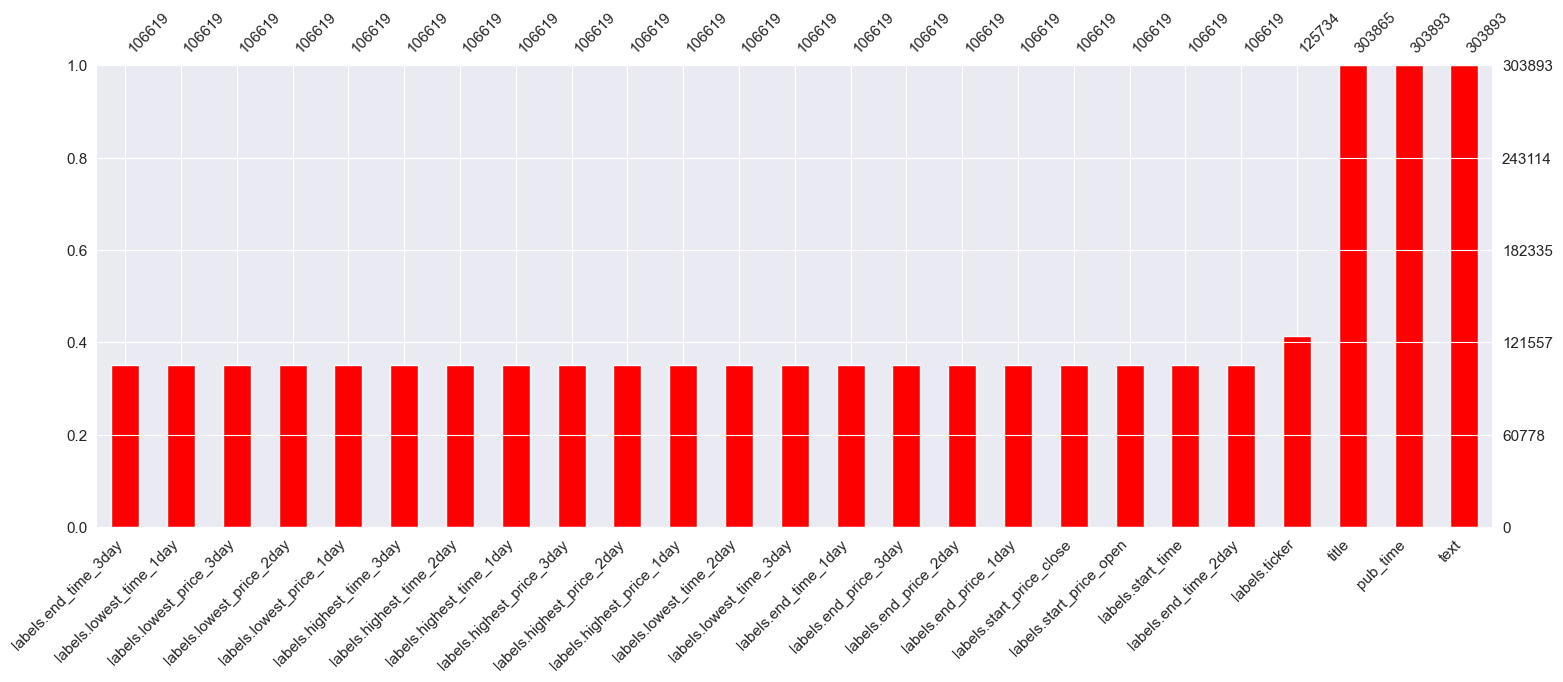

In [5]:
msno.bar(news_data, figsize=(18, 6), sort='ascending', fontsize=11, color='red')

<Axes: >

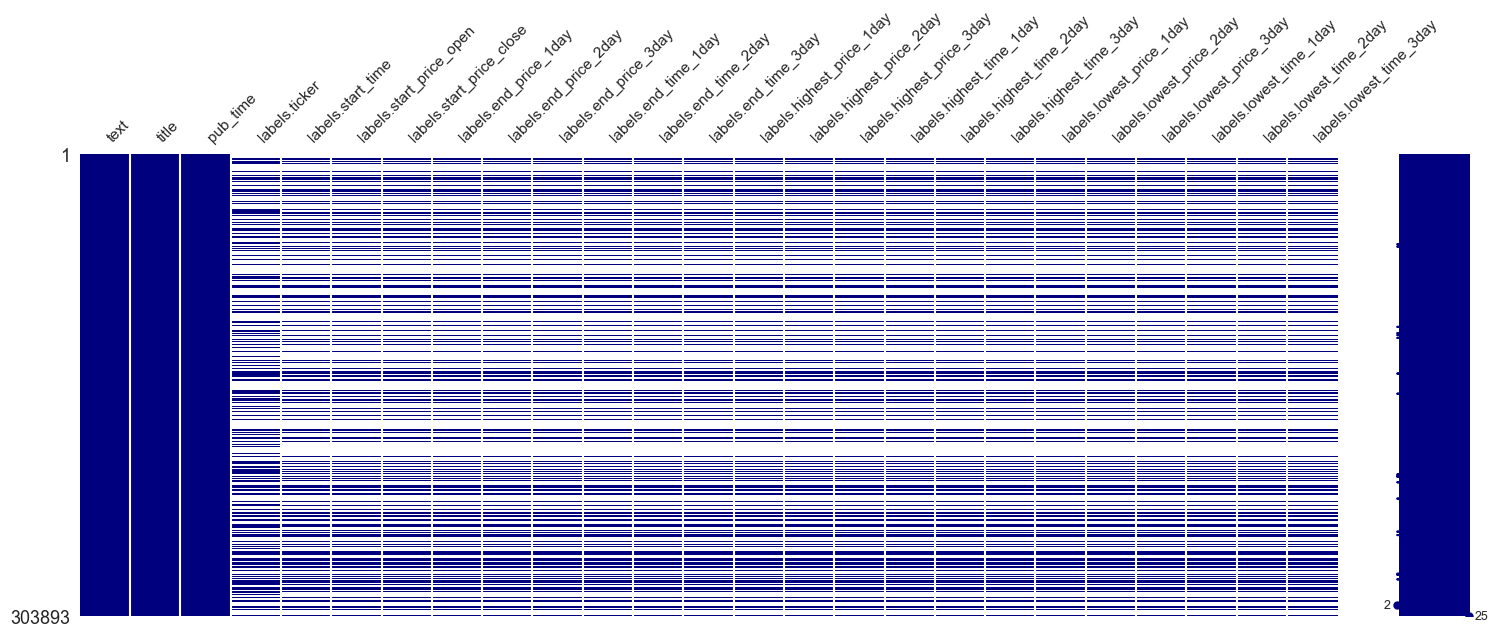

In [6]:
msno.matrix(news_data, figsize=(18, 6), fontsize=11, color=[0,0,.5])

Vemos que existen muchos registros faltantes (aproximadamente, el 65%) para aquellas columnas que identifican el ticker y sus precios en el periodo analizado. Pudimos verificar, haciendo "picking" aleatorio que esta falta de información corresponde a textos "genéricos" que no contienen noticias sobre algún ticker específico. En principio, tomaríamos la decisión de desestimar estos registros ya que no aportan información relevante para nuestro objetivo final (predecir precios según eventos).

Para conocer los diferentes ticker que contiene el dataset y sus frecuencias (sobre qué empresas informa mayormente esta batería de noticias), agrupamos a las mismas por ticker, tabulamos y graficamos:

In [7]:
ticker_count = news_data["labels.ticker"].value_counts().reset_index(). \
    rename(columns={'index': 'ticker', 'labels.ticker': 'frequency'})
ticker_count = ticker_count.sort_values(by='frequency', ascending=False)
ticker_count['% cum'] = ticker_count['frequency'].cumsum()/ticker_count['frequency'].sum()*100

print('Shape de dataset de ticker agrupados y frecuencias: {}'.\
      format(ticker_count.shape))
ticker_count.head()

Shape de dataset de ticker agrupados y frecuencias: (7198, 3)


ticker  frequency     % cum
0   MSFT       3676  2.923632
1  DISCA       1317  3.971082
2   DRIV       1231  4.950133
3   FORM        939  5.696948
4    JNJ        927  6.434218

In [8]:
frequent_tickers = ticker_count[(ticker_count['% cum'] < 20)]
print(frequent_tickers)
print(len(frequent_tickers))

   ticker  frequency      % cum
0    MSFT       3676   2.923632
1   DISCA       1317   3.971082
2    DRIV       1231   4.950133
3    FORM        939   5.696948
4     JNJ        927   6.434218
..    ...        ...        ...
68    MRK        148  19.508645
69     BR        145  19.623968
70    NOW        144  19.738496
71   VLDR        143  19.852228
72    CNC        139  19.962779

[73 rows x 3 columns]
73


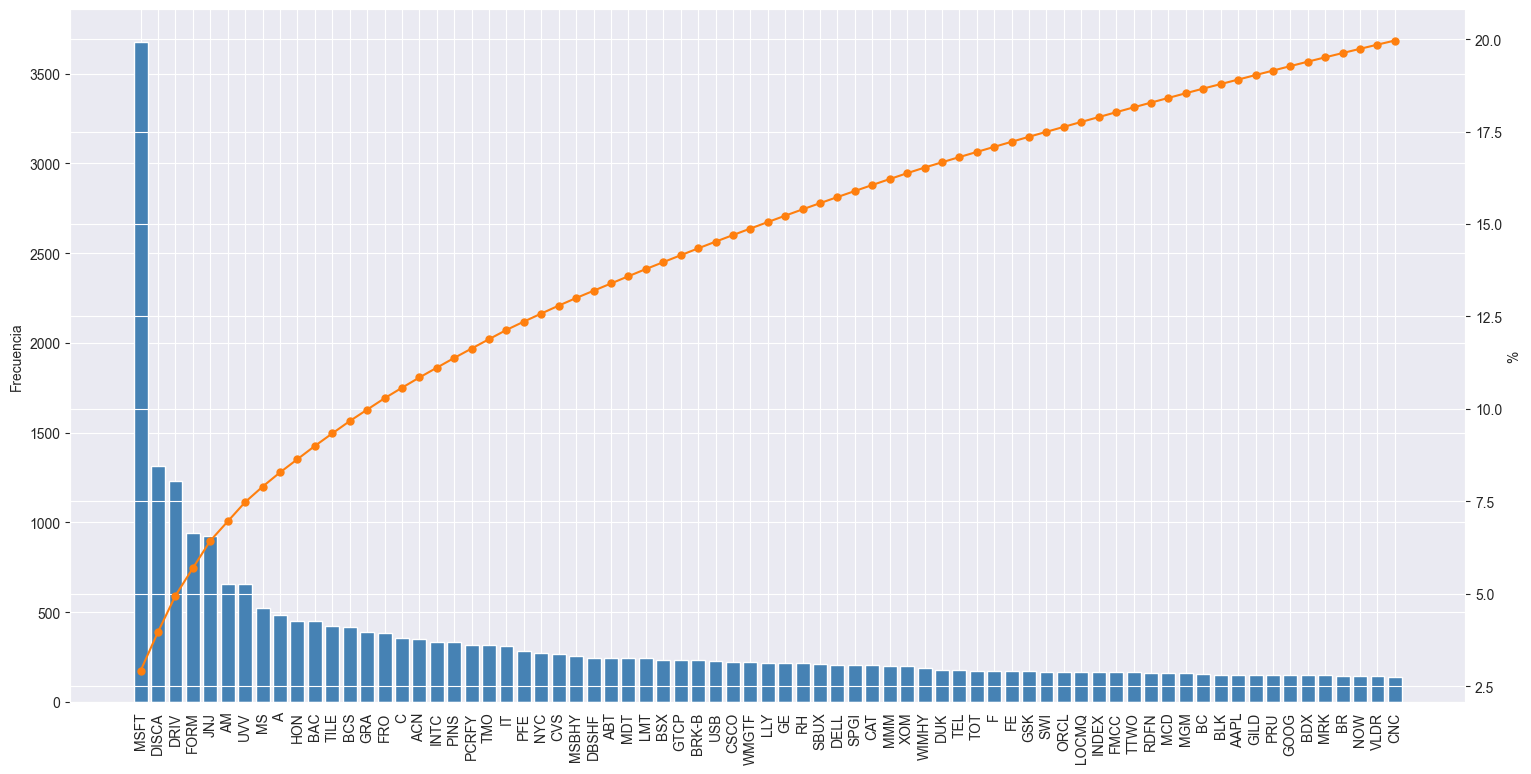

In [9]:
fig, ax = plt.subplots(figsize=(18,9))
ax.bar(frequent_tickers.ticker, frequent_tickers['frequency'], color='steelblue')
plt.xticks(rotation = 90)
ax2 = ax.twinx()
ax2.plot(frequent_tickers.ticker.values, frequent_tickers['% cum'].values, color="C1", marker="o", ms=5)
ax.set_ylabel('Frecuencia')
ax2.set_ylabel('%')
plt.xticks(rotation = 90)

plt.show()

In [10]:
### Quería graficar como se modifican los precios según la noticia pero no terminé (ni estoy segura de que
# sea la mejor aproximación)

#news1 = news_data.drop(["text", "title"], axis=1)
#news1["id"] = news1.index

# No estoy incluyendo start_price_close
#news_long_price = pd.melt(news1, id_vars=["id", "labels.ticker"], value_vars = news1.filter(regex="price_\d|price_open"), value_name = "value_price")
#news_long_price.columns

#news_long_time = pd.melt(news1, id_vars=["id", "labels.ticker"], value_vars = news1.filter(regex="time_\d|time_open"), value_name = "value_time")

#news_long_price['medida'] = news_long_price['variable'].str.extract('(highest|end|lowest|open)').fillna('')
#news_long_price['dia'] = news_long_price['variable'].str.extract('(\d)').fillna('0')

#news_long_time['precio'] = news_long_time['variable'].str.extract('(highest|end|lowest|open)').fillna('')

#news_long = pd.concat([news_long_time, news_long_price], axis=1, join="outer")
#news_long.head()

Para entender un poco la magnitud de los precios de los diferentes tickers y determinar en qué rangos se manejan, tabularemos a través del método describe la columna *labels.start_price_open*

In [11]:
news_data_dropna = news_data.dropna()
news_data_dropna

text  \
0       plano texas december 8 2020 prnewswire europea...   
1       charlotte nc october 1 2020 prnewswire duke en...   
2       south san francisco calif october 5 2020 prnew...   
4       englewood colo february 22 2021 prnewswire dis...   
5       stamford conn january 21 2021 prnewswire tru o...   
...                                                   ...   
303882  business wireppd incppd great place work best ...   
303883  londonbusiness wire form 83 public open positi...   
303886  dublinbusiness wirethe motorcycle slipon exhau...   
303889  new yorkbusiness wiremetropolitan commercial b...   
303892  dublinbusiness wirethe nonwoven tape market gr...   

                                                    title  \
0       european wax center welcome jennifer vandervel...   
1       duke energy host virtual environmental social ...   
2       pliant therapeutic appoints mike ouimette gene...   
4       dish network report fourth quarter yearend 202...   
5       targetspot integrate tru optik data management...   
...                                                   ...   
303882                                         ppd 2020tm   
303883                                    form 83 ttwo us   
303886  global motorcycle slipon exhaust system market...   
303889  metropolitan commercial bank appoints ram pupp...   
303892  outlook nonwoven tape global market 2025 grow ...   

                         pub_time labels.ticker          labels.start_time  \
0       2020-12-08 09:00:00-05:00           MIK  2020-12-08 09:00:00-05:00   
1       2020-10-01 12:11:00-04:00           DUK  2020-10-01 12:11:00-04:00   
2       2020-10-05 08:00:00-04:00          PLRX  2020-10-05 09:29:00-04:00   
4       2021-02-22 06:05:00-05:00          DISH  2021-02-22 06:09:00-05:00   
5       2021-01-21 07:30:00-05:00           TGT  2021-01-21 08:00:00-05:00   
...                           ...           ...                        ...   
303882  2020-12-07 20:00:00-05:00           PPD  2020-12-08 09:30:00-05:00   
303883  2020-11-24 10:00:00-05:00          TTWO  2020-11-24 10:00:00-05:00   
303886  2020-12-22 12:56:00-05:00          DRIV  2020-12-22 12:56:00-05:00   
303889  2021-01-13 06:00:00-05:00           STT  2021-01-13 08:01:00-05:00   
303892  2021-01-26 10:45:00-05:00           MMM  2021-01-26 10:45:00-05:00   

        labels.start_price_open  labels.start_price_close  \
0                        12.070                    12.070   
1                        89.740                    89.780   
2                        20.000                    20.000   
4                        34.250                    34.250   
5                       188.350                   189.000   
...                         ...                       ...   
303882                   35.570                    35.730   
303883                  169.565                   169.500   
303886                   23.230                    23.230   
303889                   80.330                    80.330   
303892                  175.630                   175.555   

        labels.end_price_1day  labels.end_price_2day  labels.end_price_3day  \
0                       12.80                12.4899                  13.00   
1                       90.05                91.0000                  92.00   
2                       21.43                21.9200                  24.35   
4                       32.00                30.8500                  31.40   
5                      191.00               191.7501                 190.05   
...                       ...                    ...                    ...   
303882                  34.94                34.6500                  35.14   
303883                 169.90               174.2000                 176.41   
303886                  23.50                23.4000                  23.60   
303889                  78.66                79.5800                  77.18   
303892                 175.32               184.

In [12]:
news_data_dropna.describe()

labels.start_price_open  labels.start_price_close  \
count            106614.000000             106614.000000   
mean                 77.770798                 77.775837   
std                 156.781795                156.764606   
min                   0.126780                  0.126000   
25%                  12.310000                 12.330000   
50%                  36.050000                 36.037500   
75%                  88.407500                 88.430000   
max                4805.220000               4805.220000   

       labels.end_price_1day  labels.end_price_2day  labels.end_price_3day  \
count          106614.000000          106614.000000          106614.000000   
mean               77.785428              77.921439              78.054361   
std               156.714888             157.007807             157.138475   
min                 0.127400               0.140000               0.160500   
25%                12.320000              12.350000              12.380000   
50%                36.050000              36.230050              36.300000   
75%                88.630000              88.550000              88.940550   
max              4800.000000            4826.370000            4850.000000   

       labels.highest_price_1day  labels.highest_price_2day  \
count              106614.000000              106614.000000   
mean                   78.975714                  79.843124   
std                   158.597756                 159.902986   
min                     0.129000                   0.148800   
25%                    12.710000                  12.980000   
50%                    36.750000                  37.300000   
75%                    89.767500                  90.777500   
max                  4895.000000                4903.215000   

       labels.highest_price_3day  labels.lowest_price_1day  \
count              106614.000000             106614.000000   
mean                   80.430742                 76.588515   
std                   160.890780                154.877947   
min                     0.172000                  0.121000   
25%                    13.130000                 11.950000   
50%                    37.640000                 35.300000   
75%                    91.500000                 87.198675   
max                  4916.805000               4700.000000   

       labels.lowest_price_2day  labels.lowest_price_3day  
count             106614.000000             106614.000000  
mean                  75.886530                 75.457028  
std                  153.830355                153.127663  
min                    0.121000                  0.121000  
25%                   11.750000                 11.610000  
50%                   34.870000                 34.610000  
75%                   86.400000                 86.000000  
max                 4700.000000               4700.000000

Para entender esto de una manera más visual, ilustramos en un gráfico boxplot¨, tomando como ejemplo la columna *labels.start_price_open*:

<Axes: xlabel='labels.start_price_open'>

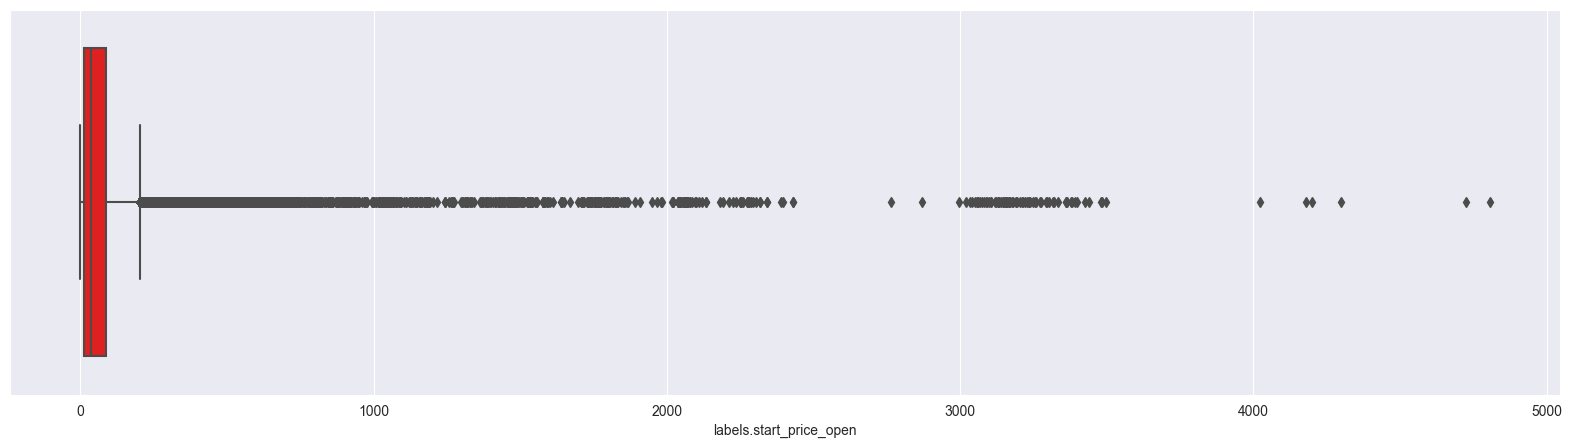

In [13]:
fig, axes = plt.subplots(figsize=(20, 5))
sns.boxplot(x=news_data_dropna['labels.start_price_open'], color='red')

Si bien se observa una gran cantidad de valores outliers, el precio de una acción es una característica intrínseca de la misma por lo que no constituyen outliers per se. Es por ello que los incluiremos en el análisis, sin desestimarlos ni eliminarlos del dataset.

Además, viendo esto, nos parece relevante observar los cambios de precio diarios en variación porcentual (de esta forma, estaríamos analizando valores relativos que serían más comparables entre sí). Para poder avanzar en este sentido, agregaremos algunas columnas a nuestro set de datos:

In [14]:
news_copy = news_data.copy()

# El porcentaje se hace en relación al precio en el que finaliza el dia anterior
news_copy['percentage_0day'] = ((news_copy['labels.start_price_close'] / news_copy['labels.start_price_open']) - 1) * 100
news_copy['percentage_1day'] = ((news_copy['labels.end_price_1day'] / news_copy['labels.start_price_close']) - 1) * 100
news_copy['percentage_2day'] = ((news_copy['labels.end_price_2day'] / news_copy['labels.end_price_1day']) - 1) * 100
news_copy['percentage_3day'] = ((news_copy['labels.end_price_3day'] / news_copy['labels.end_price_2day']) - 1) * 100

news_copy_dropna = news_copy.dropna()

In [15]:
variation_ticker = news_copy_dropna[['labels.ticker', 'percentage_0day', 'percentage_1day', 'percentage_2day', 'percentage_3day']]

# 'percentage_var_1day', 'percentage_var_2day', 'percentage_var_3day'

variation_ticker[:5]
print(variation_ticker['labels.ticker'].unique().shape)

(5010,)


In [16]:
variation_ticker.describe()

percentage_0day  percentage_1day  percentage_2day  percentage_3day
count    106614.000000    106614.000000    106614.000000    106614.000000
mean          0.178068         0.064464         0.235294         0.295992
std           2.290530         6.797662         5.500720         4.791495
min         -45.000000       -75.617647       -50.921053       -87.776141
25%           0.000000        -1.206348        -1.568032        -1.500849
50%           0.000000         0.000000         0.083333         0.093427
75%           0.012502         1.158700         1.822034         1.804124
max         231.683168      1240.998217       589.956332       313.461538

Una vez creadas estas columnas y analizados los datos a nivel tabla, pasamos a graficar la distribución de la variación de los precios para cada uno de los días analizados:

<Axes: xlabel='percentage_3day'>

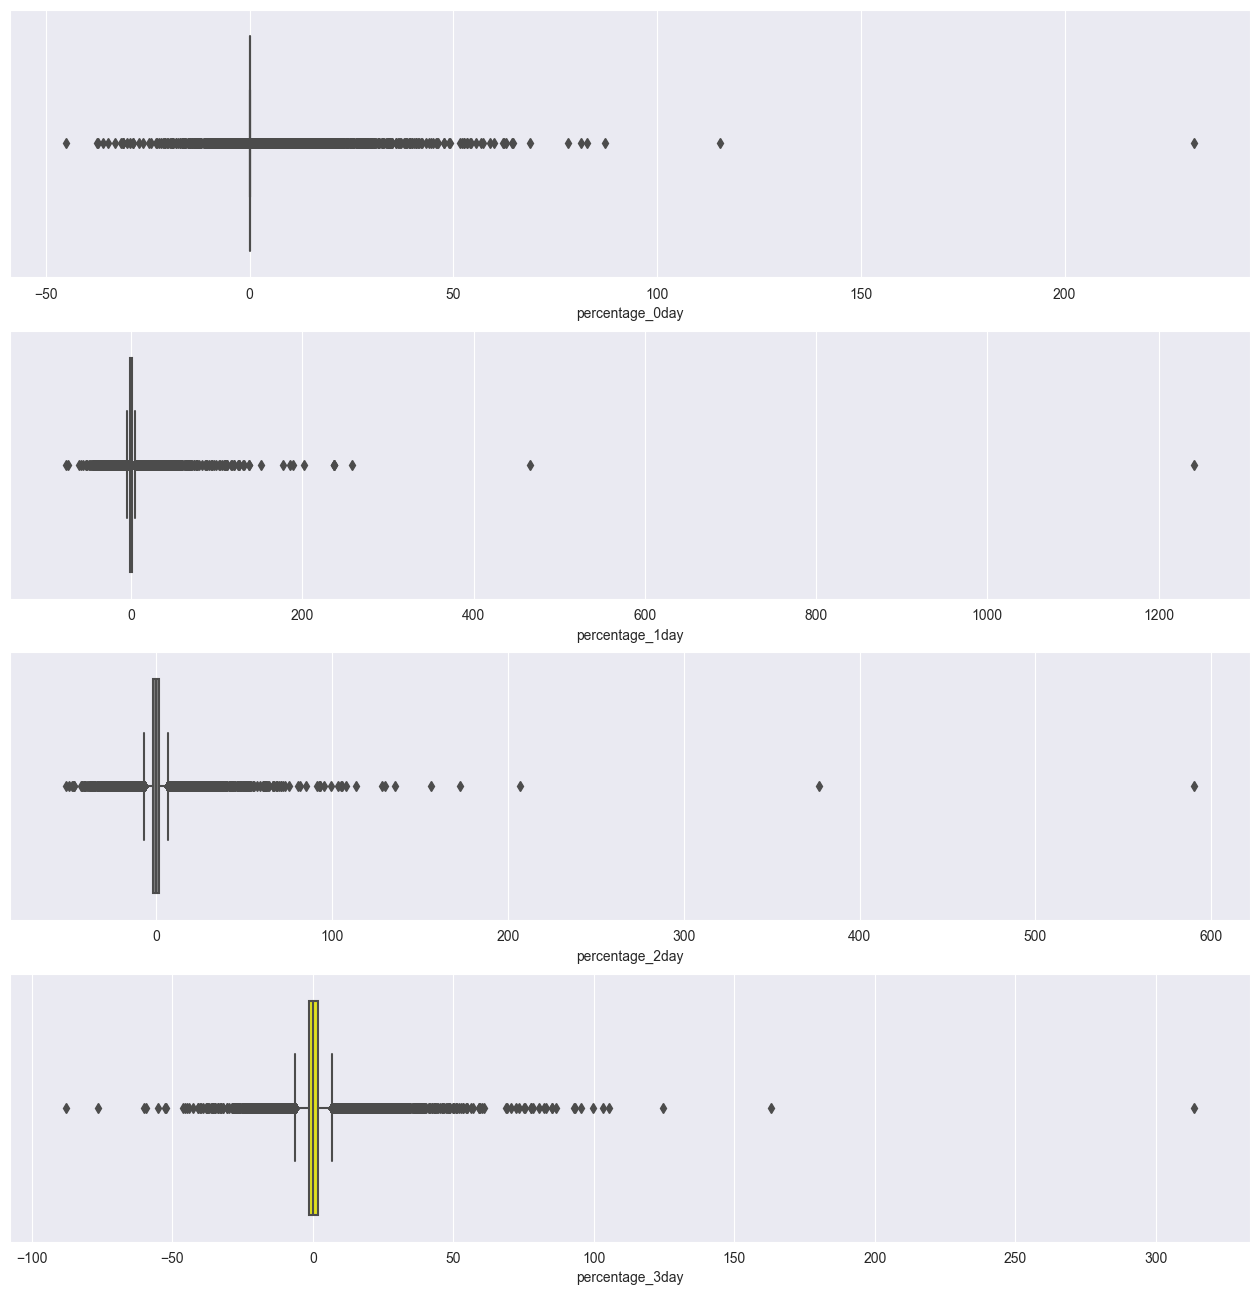

In [17]:
fig, axes = plt.subplots(nrows=4, figsize=(16, 16))
sns.boxplot(x=variation_ticker['percentage_0day'], ax=axes[0], color='red')
sns.boxplot(x=variation_ticker['percentage_1day'], ax=axes[1], color='blue')
sns.boxplot(x=variation_ticker['percentage_2day'], ax=axes[2], color='gray')
sns.boxplot(x=variation_ticker['percentage_3day'], ax=axes[3], color='yellow')

Dado que ahora estamos analizando variaciones porcentuales en los precios, aparentemente sí existen algunos valores outliers para los cuales tendremos que tomar alguna decisión según el caso. Algunas opciones que podemos barajar son las siguientes:

1- Regla de los 1.5 rangos intercuartílicos (IQR): los valores que están por debajo del valor del primer cuartil menos 1.5 veces el IQR o por encima del valor del tercer cuartil más 1.5 veces el IQR se consideran outliers.
2- Z-score: se calcula el puntaje z para cada dato, que indica cuántas desviaciones estándar está el dato por encima o por debajo de la media. Los valores con puntajes z por encima de un umbral establecido se consideran outliers.
3- Método de distancia: se basa en medir la distancia de cada punto a sus vecinos más cercanos. Los puntos que tienen una distancia por encima de un cierto umbral se consideran outliers.

Por su parte, lo que haremos en esta ocasión y para mostrar la información algo más resumida, tabularemos y graficaremos las variaciones promedio diarias agrupadas por ticker:

In [18]:
import pandas as pd

# Agrupar por 'labels.ticker' y calcular el promedio de las variaciones por día
df_grouped = variation_ticker.groupby('labels.ticker').mean()

# Calcular la frecuencia por 'labels.ticker'
df_frequency = variation_ticker['labels.ticker'].value_counts().reset_index()
df_frequency.columns = ['labels.ticker', 'frequency']

# Unir los DataFrames y ordenar por 'frequency'
df_merged = pd.merge(df_grouped, df_frequency, on='labels.ticker') #.sort_values('frequency', ascending=False)

# Filtramos
df_merged = df_merged[df_merged['frequency'] > 10]

df_merged.dropna()
# Mostrar el DataFrame resultante
print('ORDENADO POR FRECUENCIA')

print(df_merged.reset_index())
print()
print('ORDENADO POR PORCENTAJE')
print(df_merged.reset_index().sort_values(by='percentage_3day', ascending=False))

ORDENADO POR FRECUENCIA
      index labels.ticker  percentage_0day  percentage_1day  percentage_2day  \
0         0             A         0.001829        -0.064551         0.477884   
1         1            AA        -0.088042         0.023604         1.540551   
2         6           AAN        -0.037263         2.186896         3.901391   
3         8           AAP         0.149087         0.153258         0.254986   
4         9          AAPL         0.049404        -0.214732         0.175222   
...     ...           ...              ...              ...              ...   
2598   5004           ZTS         0.048447        -0.211103         0.404058   
2599   5005           ZUO        -0.170275         1.228704        -0.128394   
2600   5006           ZVO         0.598579         1.711740         2.841621   
2601   5007          ZYME         0.040236        -0.990277         0.541132   
2602   5009          ZYXI         0.247365        -1.517072        -1.707042   

      percentag

In [19]:
df_merged.describe()

percentage_0day  percentage_1day  percentage_2day  percentage_3day  \
count      2603.000000      2603.000000      2603.000000      2603.000000   
mean          0.250732         0.078736         0.228541         0.336263   
std           1.041458         1.911242         1.360371         1.272432   
min          -2.439988        -9.218270       -10.790931        -6.687685   
25%          -0.050954        -0.446364        -0.337022        -0.214531   
50%           0.014077         0.068057         0.182128         0.260509   
75%           0.135906         0.573116         0.800924         0.793995   
max          13.788125        39.433892        12.841393        15.921469   

         frequency  
count  2603.000000  
mean     37.194007  
std      93.509430  
min      11.000000  
25%      16.000000  
50%      23.000000  
75%      36.000000  
max    3676.000000

<Axes: xlabel='percentage_0day', ylabel='Count'>

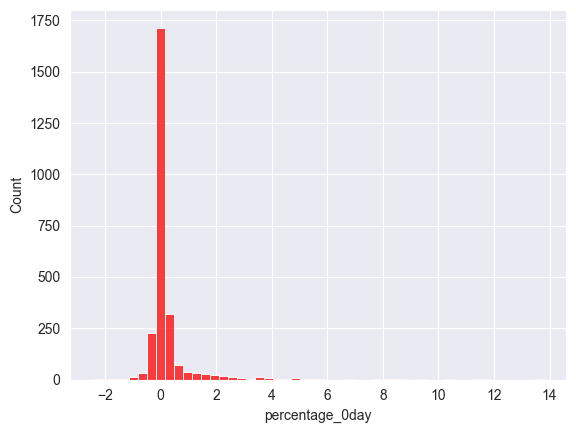

In [20]:
sns.histplot(data=df_merged, x=df_merged.percentage_0day, bins=50, color='red')

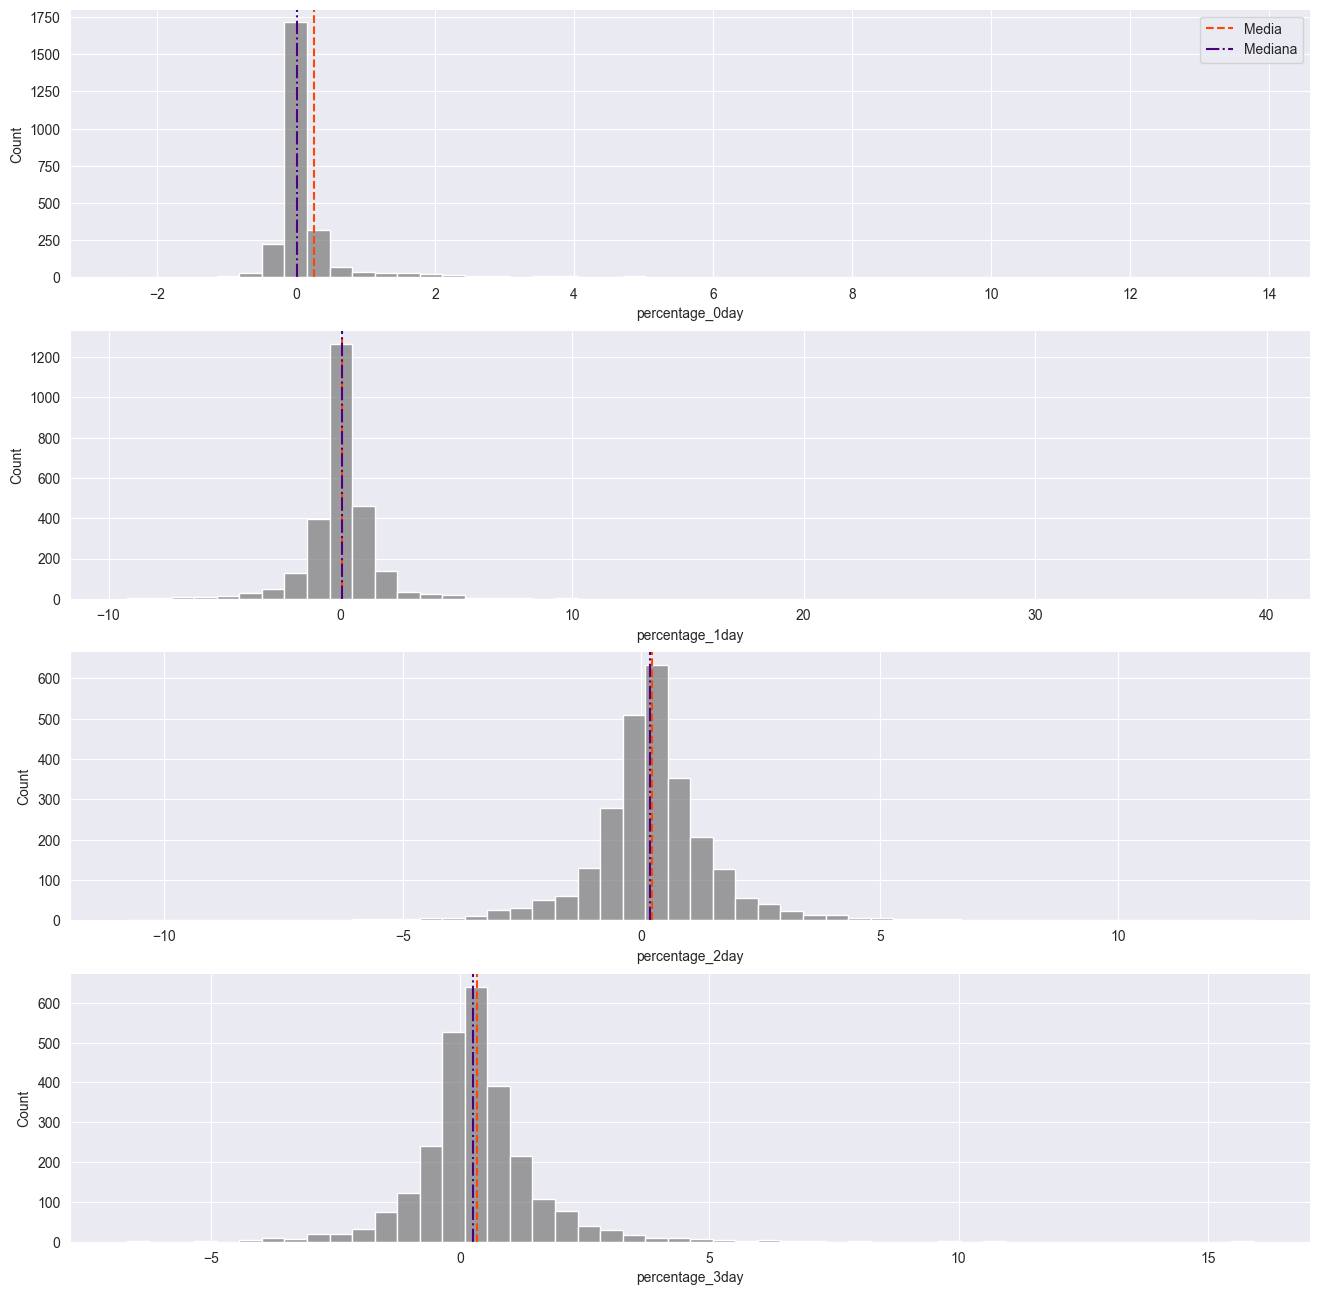

In [21]:
fig, axes = plt.subplots(nrows=4, figsize=(16, 16))
sns.histplot(df_merged['percentage_0day'], bins=50, ax=axes[0], color='gray')
axes[0].axvline(df_merged['percentage_0day'].mean(), color='orangered',
                linestyle='--', label='Media')
axes[0].axvline(df_merged['percentage_0day'].median(), color='indigo',
                linestyle='-.', label='Mediana')

sns.histplot(df_merged['percentage_1day'], bins=50, ax=axes[1], color='gray')
axes[1].axvline(df_merged['percentage_1day'].mean(), color='orangered',
                linestyle='--', label='Media')
axes[1].axvline(df_merged['percentage_1day'].median(), color='indigo',
                linestyle='-.', label='Mediana')

sns.histplot(df_merged['percentage_2day'], bins=50, ax=axes[2], color='gray')
axes[2].axvline(df_merged['percentage_2day'].mean(), color='orangered',
                linestyle='--', label='Media')
axes[2].axvline(df_merged['percentage_2day'].median(), color='indigo',
                linestyle='-.', label='Mediana')

sns.histplot(df_merged['percentage_3day'], bins=50, ax=axes[3], color='gray')
axes[3].axvline(df_merged['percentage_3day'].mean(), color='orangered',
                linestyle='--', label='Media')
axes[3].axvline(df_merged['percentage_3day'].median(), color='indigo',
                linestyle='-.', label='Mediana')

axes[0].legend()
sns.despine()

<Axes: xlabel='percentage_3day'>

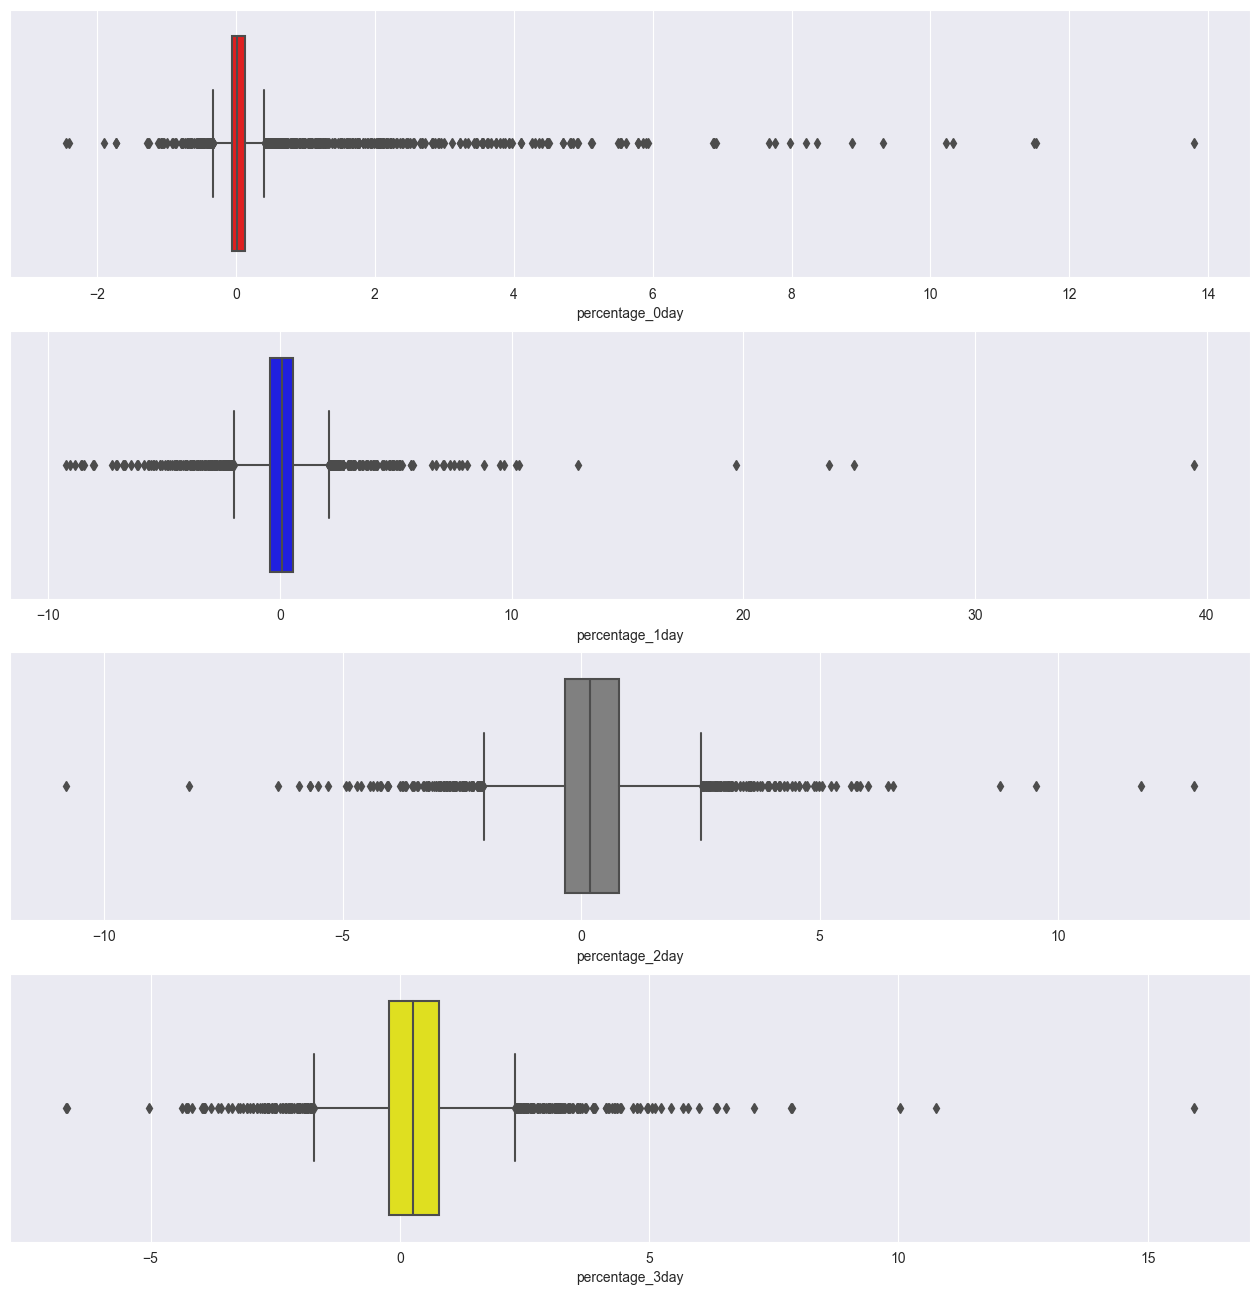

In [22]:
fig, axes = plt.subplots(nrows=4, figsize=(16, 16))
sns.boxplot(x=df_merged['percentage_0day'], ax=axes[0], color='red')
sns.boxplot(x=df_merged['percentage_1day'], ax=axes[1], color='blue')
sns.boxplot(x=df_merged['percentage_2day'], ax=axes[2], color='gray')
sns.boxplot(x=df_merged['percentage_3day'], ax=axes[3], color='yellow')

Una vez graficadas las distribuciones, nos parece interesante poder observar la evolución de los precios a través del tiempo. Si bien es puede no existir continuidad en el tiempo para los precios (ya que los datos corresponden al día + 3 días posteriores a la publicación de la noticia en cuestión), entendemos que es posible observar cierta evolución de los precios a partir del dataset.

Para ello, analizamos la estrucutra del dato para las fechas y efectuamos una transformación para hacer viable el gráfico.

In [23]:
# La idea es graficar la variación del precio a través del tiempo
print(news_data['labels.end_time_3day'][0])
type(news_data['labels.end_time_3day'][0])

2020-12-10 19:35:00-05:00


str

In [24]:
n_copy = news_data.copy()
n_copy.dropna()

text  \
0       plano texas december 8 2020 prnewswire europea...   
1       charlotte nc october 1 2020 prnewswire duke en...   
2       south san francisco calif october 5 2020 prnew...   
4       englewood colo february 22 2021 prnewswire dis...   
5       stamford conn january 21 2021 prnewswire tru o...   
...                                                   ...   
303882  business wireppd incppd great place work best ...   
303883  londonbusiness wire form 83 public open positi...   
303886  dublinbusiness wirethe motorcycle slipon exhau...   
303889  new yorkbusiness wiremetropolitan commercial b...   
303892  dublinbusiness wirethe nonwoven tape market gr...   

                                                    title  \
0       european wax center welcome jennifer vandervel...   
1       duke energy host virtual environmental social ...   
2       pliant therapeutic appoints mike ouimette gene...   
4       dish network report fourth quarter yearend 202...   
5       targetspot integrate tru optik data management...   
...                                                   ...   
303882                                         ppd 2020tm   
303883                                    form 83 ttwo us   
303886  global motorcycle slipon exhaust system market...   
303889  metropolitan commercial bank appoints ram pupp...   
303892  outlook nonwoven tape global market 2025 grow ...   

                         pub_time labels.ticker          labels.start_time  \
0       2020-12-08 09:00:00-05:00           MIK  2020-12-08 09:00:00-05:00   
1       2020-10-01 12:11:00-04:00           DUK  2020-10-01 12:11:00-04:00   
2       2020-10-05 08:00:00-04:00          PLRX  2020-10-05 09:29:00-04:00   
4       2021-02-22 06:05:00-05:00          DISH  2021-02-22 06:09:00-05:00   
5       2021-01-21 07:30:00-05:00           TGT  2021-01-21 08:00:00-05:00   
...                           ...           ...                        ...   
303882  2020-12-07 20:00:00-05:00           PPD  2020-12-08 09:30:00-05:00   
303883  2020-11-24 10:00:00-05:00          TTWO  2020-11-24 10:00:00-05:00   
303886  2020-12-22 12:56:00-05:00          DRIV  2020-12-22 12:56:00-05:00   
303889  2021-01-13 06:00:00-05:00           STT  2021-01-13 08:01:00-05:00   
303892  2021-01-26 10:45:00-05:00           MMM  2021-01-26 10:45:00-05:00   

        labels.start_price_open  labels.start_price_close  \
0                        12.070                    12.070   
1                        89.740                    89.780   
2                        20.000                    20.000   
4                        34.250                    34.250   
5                       188.350                   189.000   
...                         ...                       ...   
303882                   35.570                    35.730   
303883                  169.565                   169.500   
303886                   23.230                    23.230   
303889                   80.330                    80.330   
303892                  175.630                   175.555   

        labels.end_price_1day  labels.end_price_2day  labels.end_price_3day  \
0                       12.80                12.4899                  13.00   
1                       90.05                91.0000                  92.00   
2                       21.43                21.9200                  24.35   
4                       32.00                30.8500                  31.40   
5                      191.00               191.7501                 190.05   
...                       ...                    ...                    ...   
303882                  34.94                34.6500                  35.14   
303883                 169.90               174.2000                 176.41   
303886                  23.50                23.4000                  23.60   
303889                  78.66                79.5800                  77.18   
303892                 175.32               184.

In [25]:
from datetime import datetime

string_fecha = news_data['labels.start_time'][0]
formato_fecha = "%Y-%m-%d %H:%M:%S%z"

fecha = datetime.strptime(string_fecha, formato_fecha)
print(fecha)
print(type(fecha))

2020-12-08 09:00:00-05:00
<class 'datetime.datetime'>


In [26]:
n_copy['labels.end_time_3day'] = pd.to_datetime(n_copy['labels.end_time_3day'])

In [27]:
print(n_copy['labels.end_time_3day'][0])
type(n_copy['labels.end_time_3day'][0])

2020-12-10 19:35:00-05:00


datetime.datetime

In [28]:
print(n_copy['labels.ticker'])

0           MIK
1           DUK
2          PLRX
3           NaN
4          DISH
          ...  
303888    GRUSF
303889      STT
303890      NaN
303891      NaN
303892      MMM
Name: labels.ticker, Length: 303893, dtype: object


In [29]:
f10 = frequent_tickers[frequent_tickers.index < 10].ticker.tolist()

Una vez que transformamos el dato correspondiente a la fecha, graficamos, a modo de ejemplo, la evolución del ticker MSFT (Microsoft):

<Axes: xlabel='labels.end_time_3day', ylabel='labels.end_price_3day'>

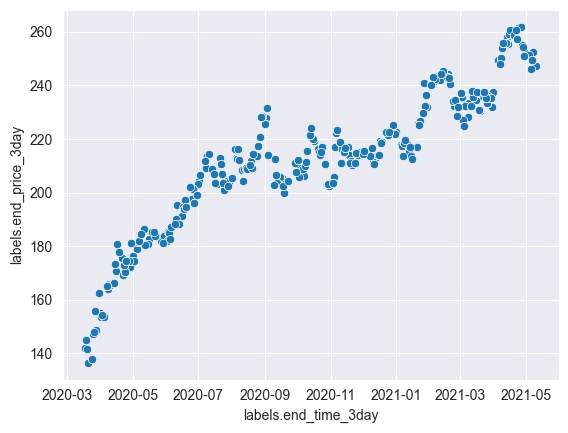

In [30]:
import seaborn as sbn
sbn.scatterplot(data=n_copy[n_copy["labels.ticker"] == "MSFT"], x = 'labels.end_time_3day', y = 'labels.end_price_3day')

Tal como habíamos mencionado y preveíamos, si bien no existe continuidad en el tiempo, es posible observar una clara evolución de los precios para el período analizado. Es cierto también que el ticker graficado es el que mayor datos posee en el dataset y es probable que el gráfico no sea viable para tickers con menor cantidad de información. Dicho esto, evaluaremos la evolución de los precios para las 10 empresas principales, según cantidad de noticias para cada una de ellas:

<Axes: xlabel='labels.end_time_3day', ylabel='labels.end_price_3day'>

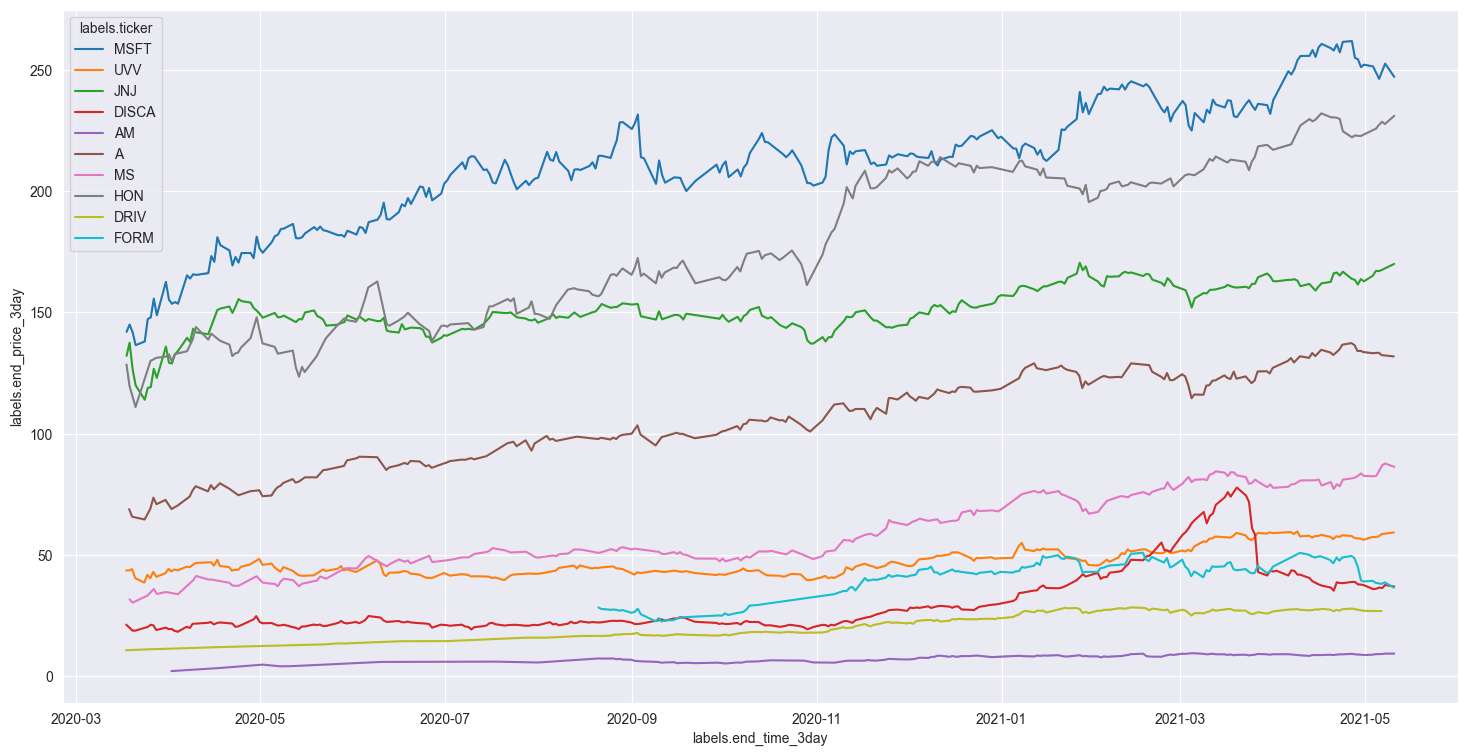

In [31]:
plt.figure(figsize=(18,9))
sbn.lineplot(data=n_copy[n_copy['labels.ticker'].isin(f10)], x = 'labels.end_time_3day', y = 'labels.end_price_3day', hue='labels.ticker')

<Axes: xlabel='labels.end_time_3day', ylabel='labels.end_price_3day'>

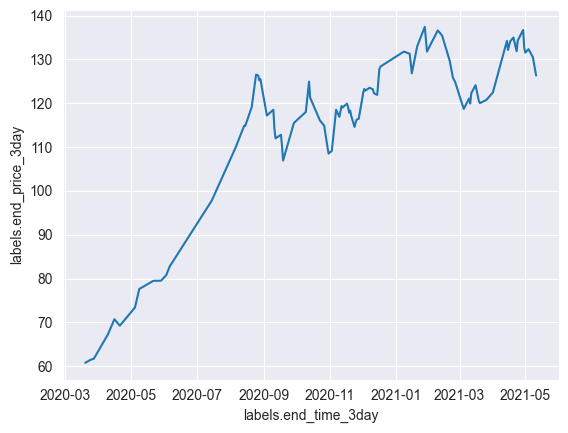

In [32]:
sbn.lineplot(data=n_copy[n_copy["labels.ticker"] == "AAPL"], x = 'labels.end_time_3day', y = 'labels.end_price_3day')

Para analizar el comportamiento del mercado a lo largo del tiempo, graficaremos la media de los precios agrupando por día de publicación:

In [39]:
n_date = n_copy.dropna()

print(datetime.date(n_date['labels.end_time_3day'][0]))

n_date['3day_date_modified'] = n_date['labels.end_time_3day'].apply(datetime.date)

n_date_grouped = n_date.groupby(n_date['3day_date_modified'])['labels.end_price_3day'].mean().reset_index().\
    rename(columns={'3day_date_modified': '3day_date', 'labels.end_price_3day': 'end_price_3day_mean'})
n_date_grouped



2020-12-10


C:\Users\facundo\AppData\Local\Temp\ipykernel_11832\2648009929.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_date['3day_date_modified'] = n_date['labels.end_time_3day'].apply(datetime.date)


3day_date  end_price_3day_mean
0    2020-03-12            53.600000
1    2020-03-17            46.165811
2    2020-03-18            60.655281
3    2020-03-19            54.824462
4    2020-03-20            48.583310
..          ...                  ...
283  2021-05-05            75.748570
284  2021-05-06            95.191067
285  2021-05-07            74.636611
286  2021-05-10            68.904190
287  2021-05-11            98.027583

[288 rows x 2 columns]

<Axes: xlabel='3day_date', ylabel='end_price_3day_mean'>

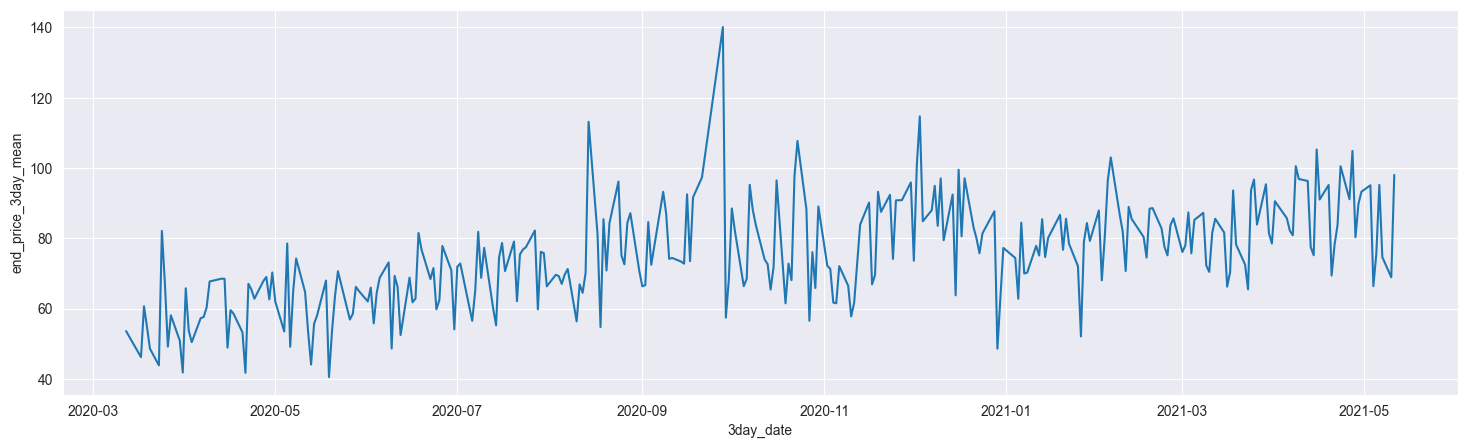

In [42]:
plt.figure(figsize=(18,5))
sbn.lineplot(data=n_date_grouped, x = n_date_grouped['3day_date'], y = n_date_grouped['end_price_3day_mean'])

Si bien se observa una tendencia al alza, el gráfico no es muy legible ya que denota cierta volatilidad diaria a partir de sus "picos", que no existe en la realidad. Esto se puede deber a que no existen demasiadas publicaciones diarias que verdaderamente reflejen el promedio de los precios.

Para solucionar esto, se puede modificar la temporalidad diaria a semanal/mensual, mostrando el promedio de los precios por semana/mes. De esta forma, se reduce la sensibilidad del gráfico, evitando la forma de "serrucho" que se observa con anterioridad.